# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(8, 6)) # figure size

sns.set_style("darkgrid")
import itertools

<Figure size 576x432 with 0 Axes>

# Utility Functions and Pipelines

In [6]:
def show_outliers(df):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    sns.set(font_scale = 1) 
    fig, axes = plt.subplots(nrows = 3, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (12,8))
    fig.tight_layout()
    for ax,col in zip(axes.flatten(), df_num_cols.columns):
        sns.boxplot(x = df_num_cols[col],  ax = ax)
    fig.suptitle('Detecting Outliers', color = 'r', fontsize = 18)

In [7]:
def show_numeric_columns_distributions(df, wspace = 0.2, hspace = 0.5):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    columns = df_num_cols.columns[: len(df_num_cols.columns)]
    fig = plt.figure()
    fig.set_size_inches(12, 8)
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length / 2), 3, j+1)
        plt.subplots_adjust(wspace = wspace, hspace = hspace) 
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    fig = fig.suptitle('Numerical Data Distributions', color = 'r' ,fontsize = 18)
    plt.show()

In [8]:
def show_categorical_columns_counts(df, wspace = 0.2, hspace = 0.5):
    df_cat_cols = df.select_dtypes(include='object')
    columns = df_cat_cols.columns[: len(df_cat_cols.columns)]
    fig = plt.figure()
    fig.set_size_inches(18, 15)
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length / 2), 3, j+1)
        plt.subplots_adjust(wspace = wspace, hspace = hspace) # adjust
        df_cat_cols[i].value_counts().plot(kind='bar')
        #plt.xticks(rotation=70)
        plt.title(i)
    fig = fig.suptitle('Categorical Data Counts', color = 'r' ,fontsize = 18)
    plt.show()

# Read datasets

In [2]:
Transactions = pd.read_excel('Transactions.xlsx')

In [15]:
CustomerDemo = pd.read_excel('CustomerDemo.xlsx')

In [4]:
CustomerAddr = pd.read_excel('CustomerAddr.xlsx')

In [24]:
NewCustomer = pd.read_excel('NewCustomer.xlsx')

# Data Viz

## Table: Transactions

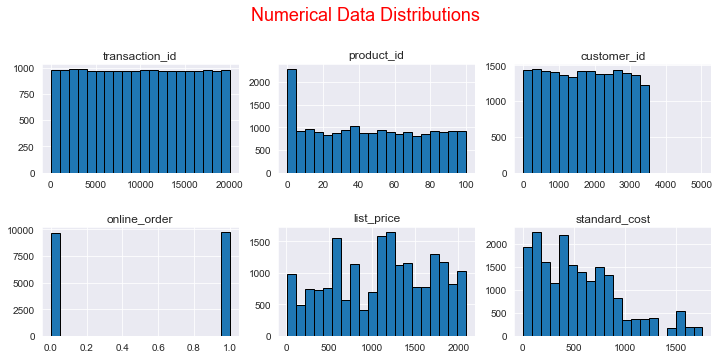

In [9]:
show_numeric_columns_distributions(Transactions)

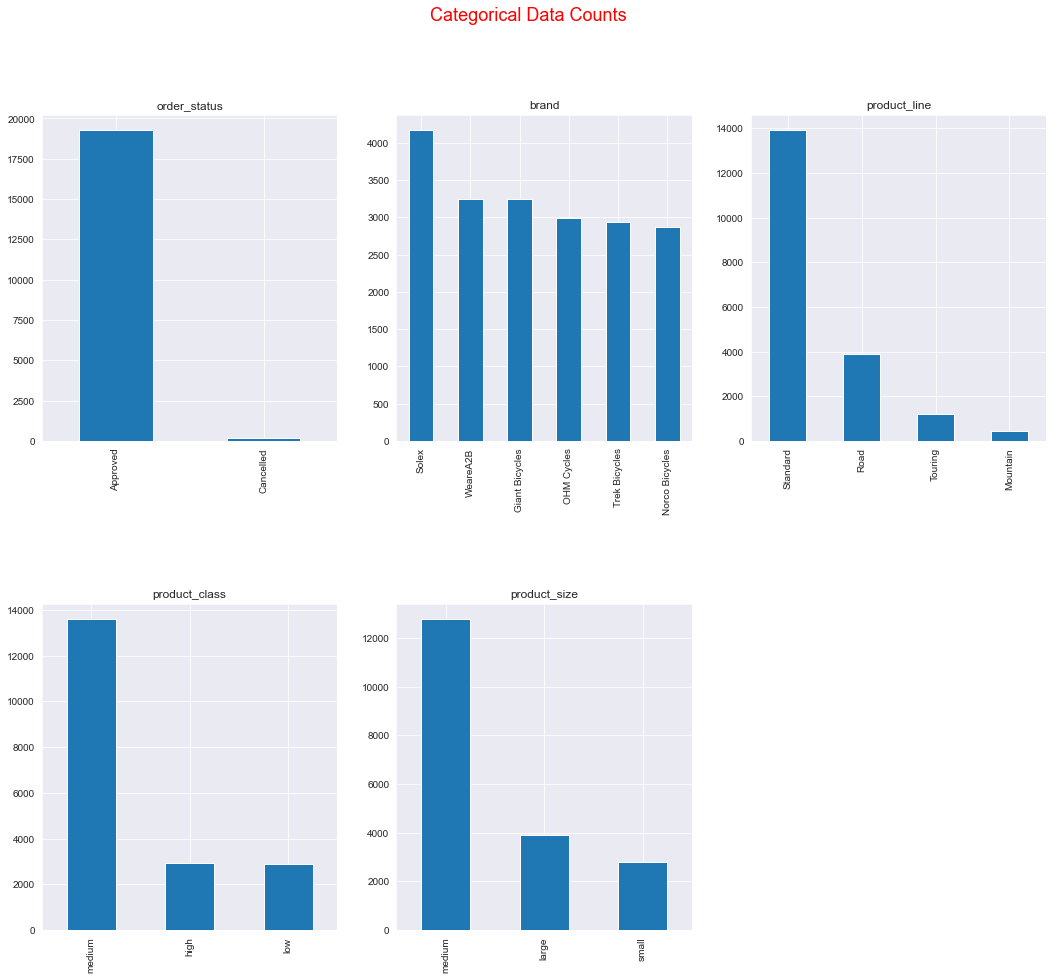

In [10]:
show_categorical_columns_counts(Transactions)

(6.5, -0.5)

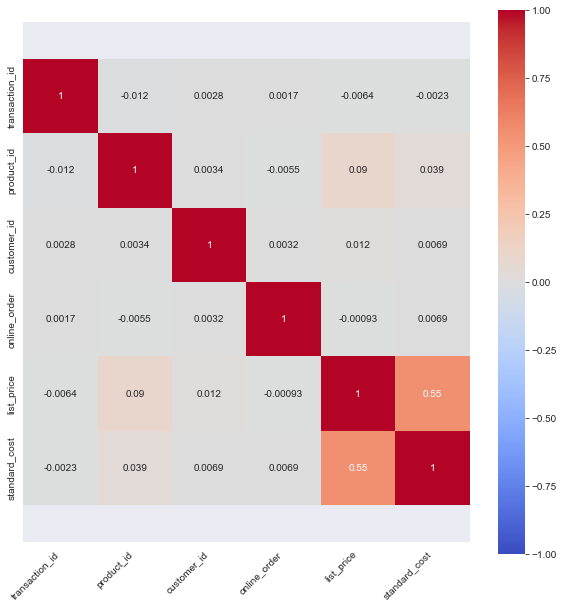

In [11]:
# correlationship
corr = Transactions.corr()

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Table: CustomerDemo

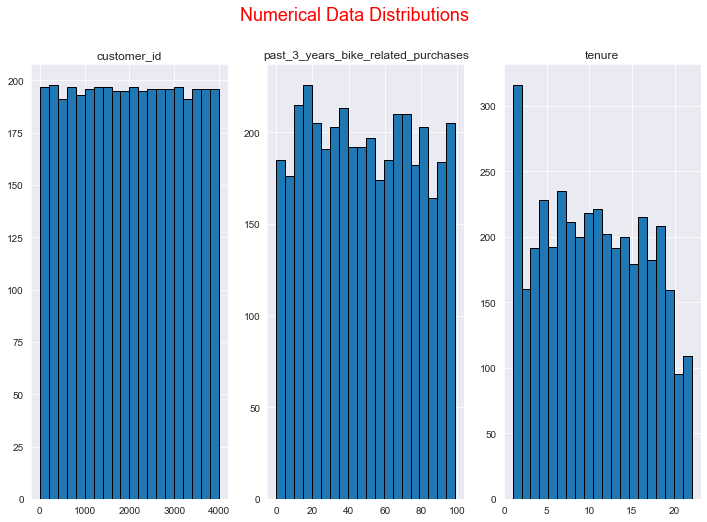

In [12]:
show_numeric_columns_distributions(CustomerDemo)

In [16]:
CustomerDemo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure'],
      dtype='object')

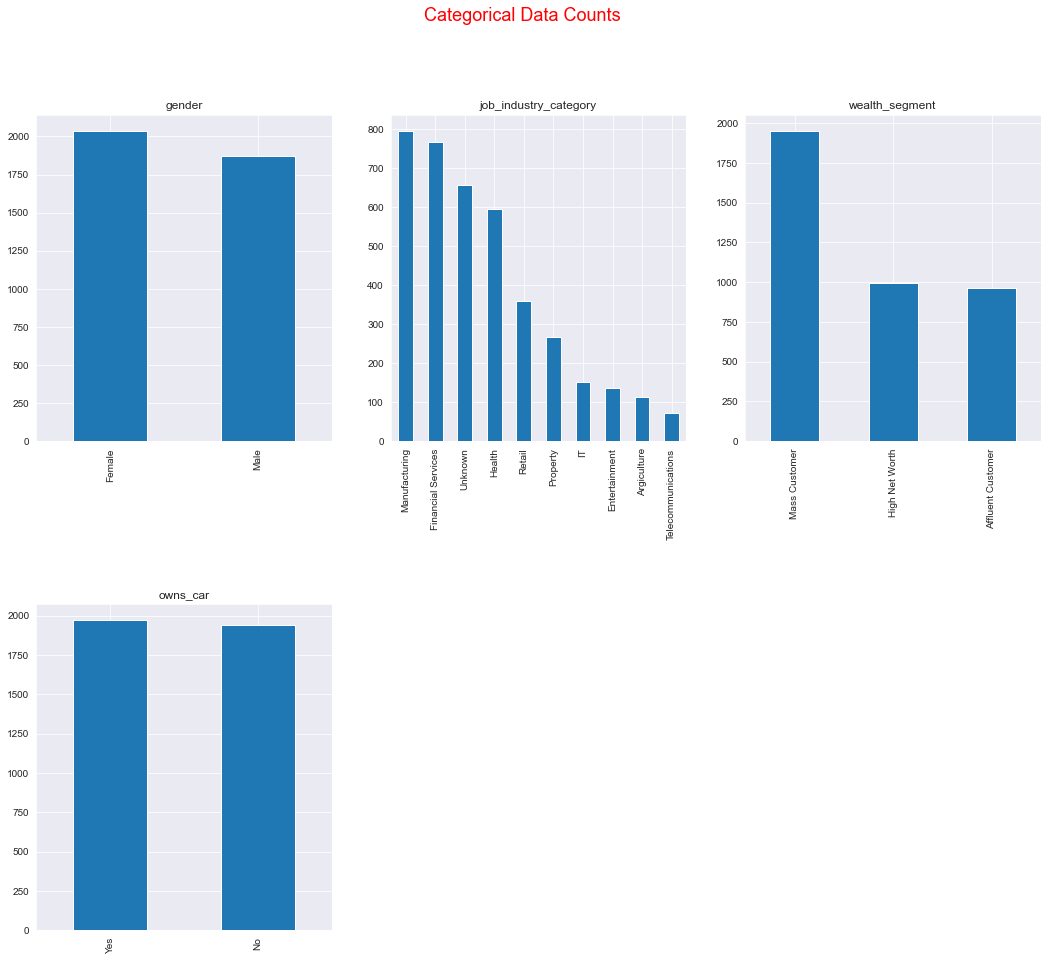

In [17]:
show_categorical_columns_counts(CustomerDemo[['gender',
       'past_3_years_bike_related_purchases', 'DOB', 
       'job_industry_category', 'wealth_segment',
       'owns_car', 'tenure']])

## Table: CustomerAddr

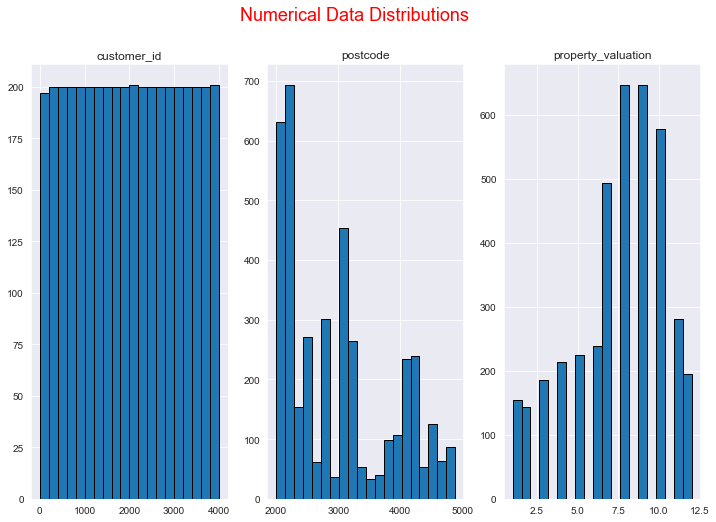

In [18]:
show_numeric_columns_distributions(CustomerAddr)

In [19]:
CustomerAddr.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

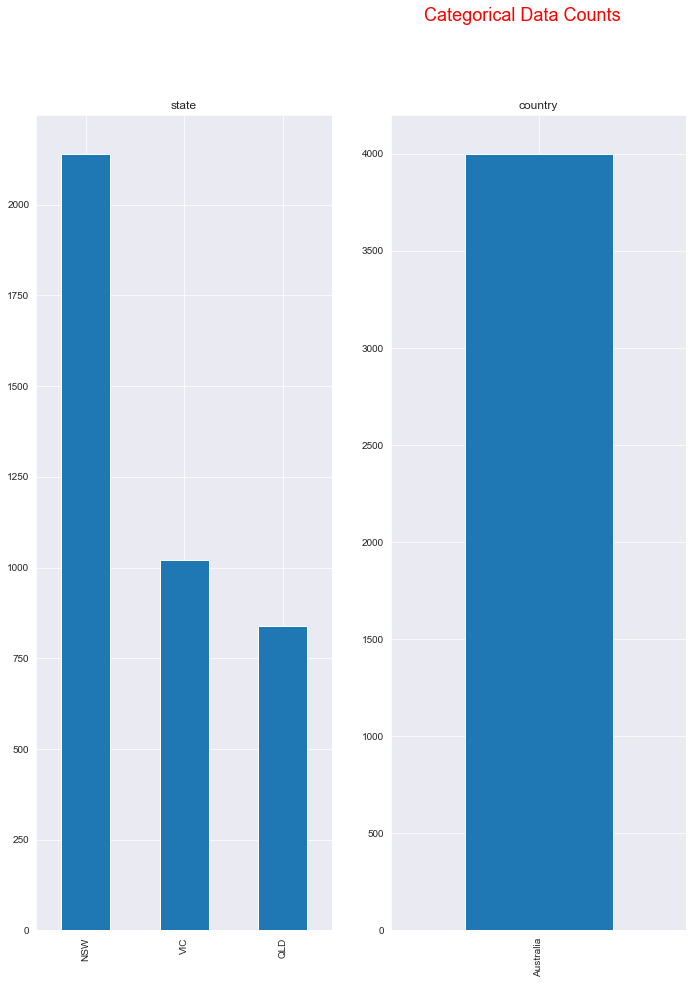

In [20]:
show_categorical_columns_counts(CustomerAddr[['postcode', 'state', 'country']])

## Table: NewCustomer

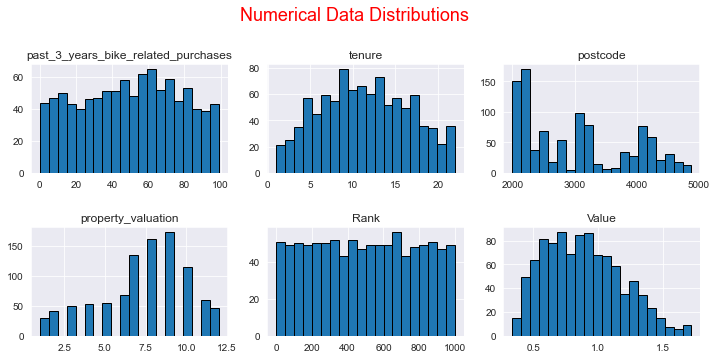

In [21]:
show_numeric_columns_distributions(NewCustomer)

In [25]:
NewCustomer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation', 'Rank',
       'Value'],
      dtype='object')

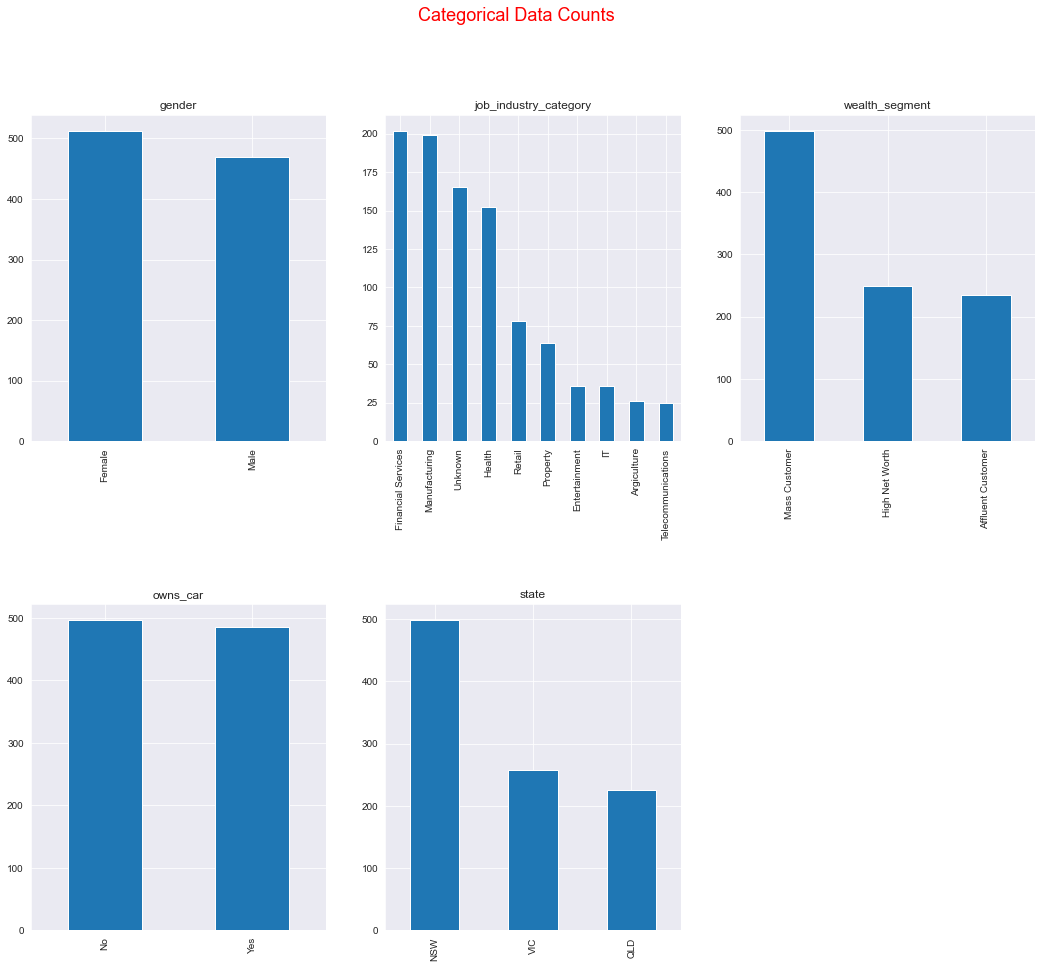

In [26]:
show_categorical_columns_counts(NewCustomer[['gender',
       'past_3_years_bike_related_purchases', 'DOB', 
       'job_industry_category', 'wealth_segment', 
       'owns_car', 'tenure', 'postcode', 'state', 
       'property_valuation', 'Rank', 'Value']])

## Combo Tables: transactions + customerDemo + CustomerAddress

In [27]:
df_temp = pd.merge(CustomerDemo, CustomerAddr, left_on="customer_id", right_on="customer_id")

In [28]:
combo = pd.merge(Transactions, df_temp, left_on="customer_id", right_on="customer_id")

In [29]:
combo.shape

(18978, 28)

In [30]:
combo['transaction_id'].nunique()

18978

**Conclustion: 18978 transaction entries in total**

In [31]:
combo.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='brand'>

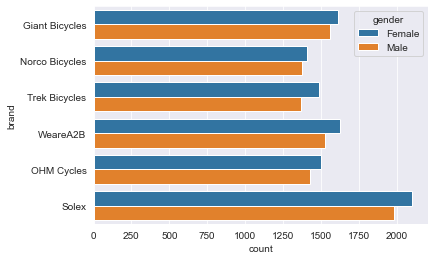

In [32]:
sns.countplot(y="brand", hue="gender", data=combo)

<AxesSubplot:xlabel='count', ylabel='brand'>

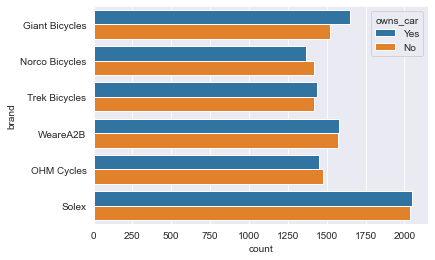

In [33]:
sns.countplot(y="brand", hue="owns_car", data=combo)

<AxesSubplot:xlabel='count', ylabel='product_line'>

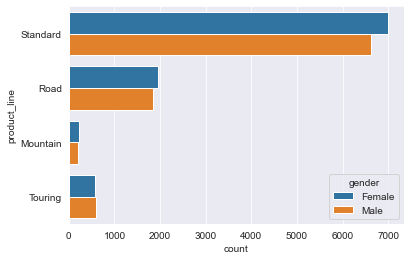

In [34]:
sns.countplot(y="product_line", hue="gender", data=combo)

<AxesSubplot:xlabel='count', ylabel='brand'>

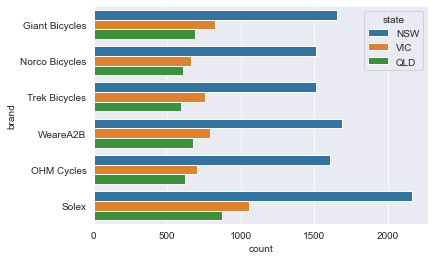

In [35]:
sns.countplot(y="brand", hue="state", data=combo)

<AxesSubplot:xlabel='list_price', ylabel='standard_cost'>

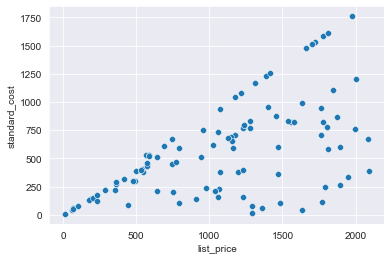

In [36]:
sns.scatterplot(data=combo, x="list_price", y="standard_cost")